<a href="https://colab.research.google.com/github/sidd2307/Handwritten-Digits-Recognition-2/blob/main/Handwritten_Digit_Recognition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 #import real images
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#dataset of 60,000 samples of real human written numbers
mnist = tf.keras.datasets.mnist

In [ ]:
#split it into training and testing datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#normalise the data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [ ]:
#Basic Neural Network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28))) #input of 28x28 shape
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 3) #3 times repeat

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4595 - accuracy: 0.8729
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1100 - accuracy: 0.9662
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9787


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy, loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9719
0.9718999862670898 0.0900120958685875


In [ ]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model/assets


The result is probably: 8


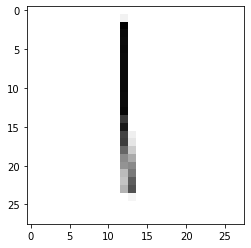

The result is probably: 2


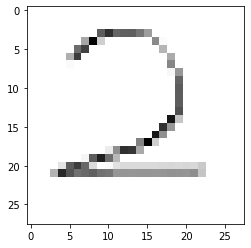

The result is probably: 3


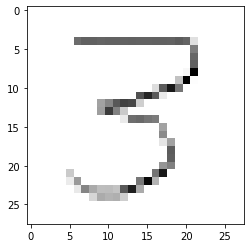

The result is probably: 4


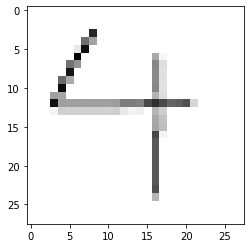

The result is probably: 5


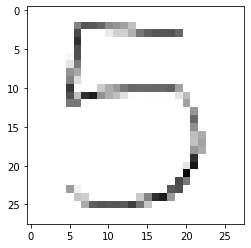

In [ ]:
for x in range(1,6):
  img = cv2.imread(f'{x}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'The result is probably: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap = plt.cm.binary)
  plt.show()